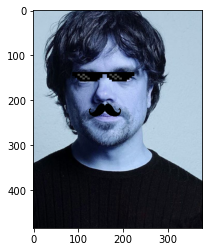

(485, 377, 3)


In [3]:
    import cv2
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    img = cv2.imread('Before.png')
    glasses = cv2.imread("glasses.png",cv2.IMREAD_UNCHANGED)
    glasses = cv2.cvtColor(glasses,cv2.COLOR_BGRA2RGBA)
    moush = cv2.imread("mustache.png",cv2.IMREAD_UNCHANGED)
    moush = cv2.cvtColor(moush,cv2.COLOR_BGRA2RGBA)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
    eye_cascade = cv2.CascadeClassifier('frontalEyes35x16.xml')
    nose_cascade = cv2.CascadeClassifier('Nose18x15.xml')
    # plt.imshow(img)

    eyes = eye_cascade.detectMultiScale(img,1.3,5)
    noses = nose_cascade.detectMultiScale(img,1.3,5)
    (x,y,w,h) = eyes[0]
   # print(x)
    glasses = cv2.resize(glasses,(w+10,h))
   # cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    for i in range(glasses.shape[0]):
        for j in range(glasses.shape[1]):
            if(glasses[i,j,3]>0):
                img[y+i, x-10+j,:]=glasses[i,j,:-1]

    (x,y,w,h) = noses[0]
  #  print(x)
    moush = cv2.resize(moush,(w+10,h))
    #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    for i in range(moush.shape[0]):
        for j in range(moush.shape[1]):
            if(moush[i,j,3]>0):
                img[y+i+30, x+j,:]=moush[i,j,:-1]

    #for (nx,ny,nw,nh) in noses:
   #     cv2.rectangle(img,(nx,ny),(nx+nw,ny+nh),(0,255,0),2)

    # cv2.imshow("Img",img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    plt.imshow(img)
    plt.show()
    print(img.shape)
    ans1 = []
    ans2 = []
    ans3 = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            ans1.append(img[i][j][0])
            ans2.append(img[i][j][1])
            ans3.append(img[i][j][2])
    ans1 = np.array(ans1)
    ans2 = np.array(ans2)
    ans3 = np.array(ans3)
    answer = {"Channel 1": ans1,"Channel 2": ans2,"Channel 3": ans3}
    df = pd.DataFrame(answer)
    df.to_csv("answer.csv",index=False)

            